## Objective: Real Time Fraud Detection System
    

__Import Libraries__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.callback import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score
import shap
import joblib


__Load the Data__

In [5]:
import kagglehub
import shutil
import os

# get the current working directory
curr_dir = os.getcwd()

# download the dataset in currect folder
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Construct the full path to the downloaded CSV file
csv_path = os.path.join(path, "creditcard.csv")

# Move the CSV to current directory
shutil.copy(csv_path, curr_dir)


'c:\\Users\\ravis\\Documents\\Python Programs\\Interview\\Machine Learning\\Advance Models\\Real-Time-Fraud-Detection-System\\creditcard.csv'

In [3]:
df_fraud = pd.read_csv("creditcard.csv")
df_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


__Check the shape__

In [4]:
len(df_fraud),len(df_fraud.columns)

(284807, 31)

__Check the null values__

In [5]:
print(df_fraud.isnull().sum().to_list()) # use list to get result in compact way

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

__Check for unbalance Class__

In [7]:
counts_of_class = df_fraud["Class"].value_counts()
print(counts_of_class)

Class
0    284315
1       492
Name: count, dtype: int64


__Percentage of unbalance data__

In [8]:
print((counts_of_class / len(df_fraud)).round(6) * 100)


Class
0    99.8273
1     0.1727
Name: count, dtype: float64


__Calculate scale_pos_weight for XGBoost__

- scale_pos_weight helps XGBoost handle class imbalance by focusing more on the minority class.
- Tree-based models like XGBoost split features based on thresholds, so synthetic samples from SMOTE don't add much value and can introduce noise.
- Using scale_pos_weight keeps the dataset lean and is great for real time or production environments

In [9]:
# tells XGBoost to upweight the minority class (fraud)
scale_pos_weight = counts_of_class[0] / counts_of_class[1]
float(scale_pos_weight)


577.8760162601626

It means model will give 577× more attention to fraud cases compared to valid ones during training.


__Feature Engineering on "Time"__

- Time" is in seconds since the first transaction
- so here I apply __derived temporal features__ "hour of the day" of the transaction since the previous transaction
- "hour of the day" column can help your model capture patterns related to the time of day, which is useful for fraud detection since fraudulent transactions often occur at unusual hours

In [10]:
df_fraud = df_fraud.copy()

- Added new feature __"hour of the day"__

In [11]:
df_fraud["hour of the day"] = (df_fraud['Time'] // 3600) % 24
# drop time column
df_fraud = df_fraud.drop("Time", axis=1)

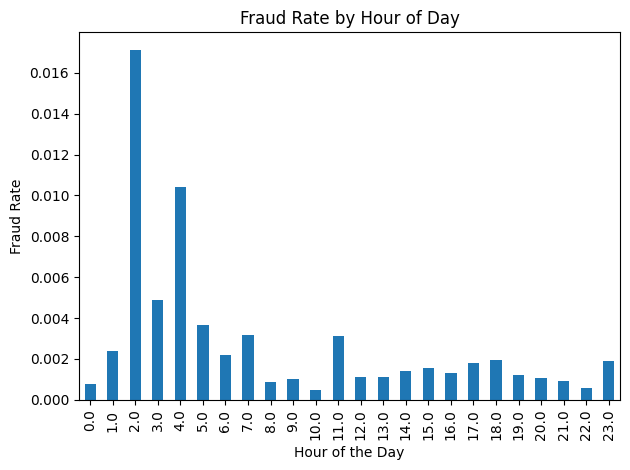

In [12]:
fraud_rate_by_hour = df_fraud.groupby("hour of the day")["Class"].mean()
fraud_rate_by_hour.plot(kind='bar')
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Hour of Day")
plt.tight_layout()

- The bar plot reveals distinct temporal patterns in fraudulent transactions. 
- Fraud peaks notably during early morning hours (e.g. 2–4 AM), suggesting that fraudsters may exploit periods of low surveillance or reduced transaction monitoring.

- Create cyclical features

Row number like 0 and 23 can break the cycle because they look far from each other numerically but - Hour 0 and hour 23 are right next to each other on the clock So we map hours to positions on a circle using sine and cosine


In [13]:
# Create cyclical features for "hour of the day" to capture periodicity
df_fraud['hour_sin'] = np.sin(2 * np.pi * df_fraud['hour of the day'] / 24) # captures vertical component of time

df_fraud['hour_cos'] = np.cos(2 * np.pi * df_fraud['hour of the day'] / 24) # captures horizontal component of time


In [14]:
df_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,hour of the day,hour_sin,hour_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.000000,1.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.000000,1.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.000000,1.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.000000,1.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0,-0.258819,0.965926
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0,-0.258819,0.965926
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0,-0.258819,0.965926
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0,-0.258819,0.965926


In [15]:
df_fraud.shape

(284807, 33)

__Separate the fraud and valid Case__

- 1 -> Fraud Detection
- 0 -> No Fraud Detection 

In [17]:
# Separate the fraud and valid (non-fraud) cases from the dataset
fraud_case = df_fraud[df_fraud["Class"] == 1]
valid_case = df_fraud[df_fraud["Class"] == 0]

In [18]:
print(valid_case[["Amount"]].describe())

              Amount
count  284315.000000
mean       88.291022
std       250.105092
min         0.000000
25%         5.650000
50%        22.000000
75%        77.050000
max     25691.160000


In [19]:
df_fraud.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,hour of the day,hour_sin,hour_cos
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,14.050623,-0.244760,-0.174522
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,11.646341,-0.056595,-0.051663




Observations from Statistical Summary

- PCA components (V3, V10) show more extreme values for fraud, suggesting behavioral deviation
- Fraud average transaction amount is higher (122.21 vs 88.29)
- Cyclical time features reflect non-random temporal patterns in fraud behavior

__Visualizing__

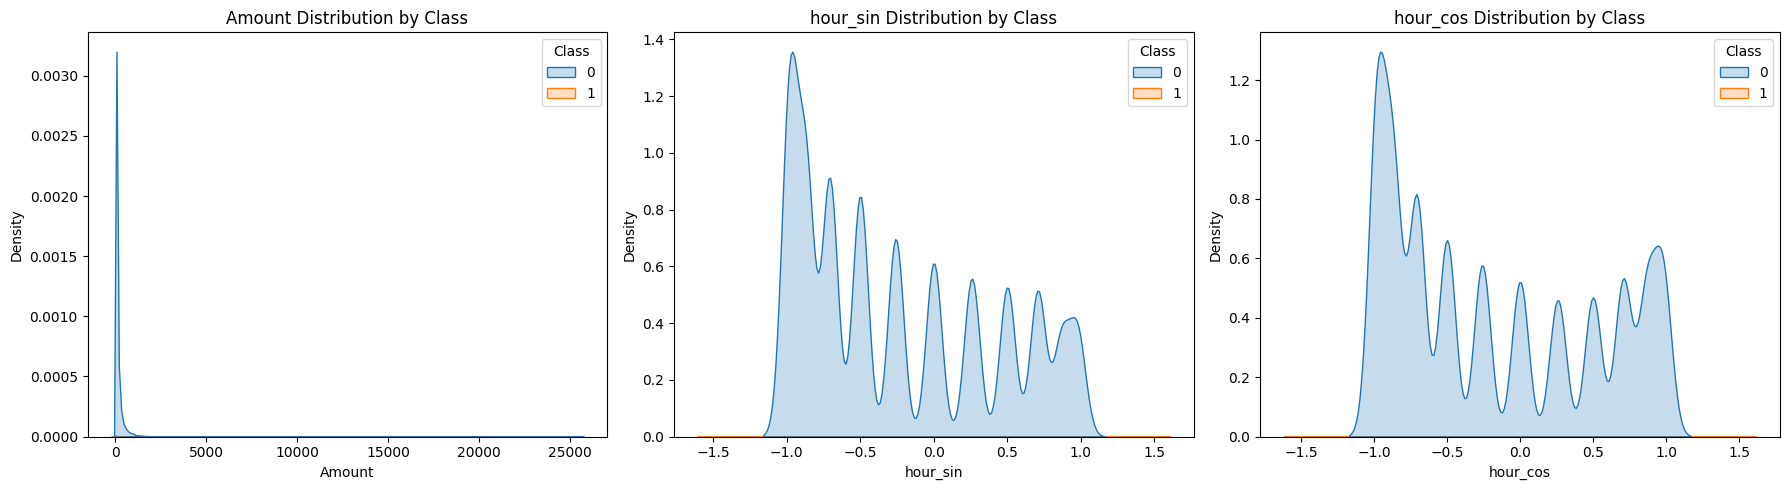

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data=df_fraud, x='Amount', hue='Class', fill=True, ax=axs[0])
axs[0].set_title('Amount Distribution by Class')

sns.kdeplot(data=df_fraud, x='hour_sin', hue='Class', fill=True, ax=axs[1])
axs[1].set_title('hour_sin Distribution by Class')

sns.kdeplot(data=df_fraud, x='hour_cos', hue='Class', fill=True, ax=axs[2])
axs[2].set_title('hour_cos Distribution by Class')

plt.tight_layout()
plt.show()

- KDE Analysis: Amount and Time-Based Features
    - Amount: Fraudulent transactions often have a wider range of amounts, showing they can be unusually large or small.
    - hour_sin: This captures the time of day in a cyclical way. Fraud cases show unusual patterns, happening at odd times.
    - hour_cos: Also encodes time of day, but on a different axis. Lower values for fraud suggest these transactions are clustered at specific times.

    By looking at these plots, we can clearly see that fraud is different not just in the amount, but also in when it happens.

__Features and Labels for Modeling__

In [21]:
df_fraud = df_fraud.copy()

In [22]:
X = df_fraud.drop(['Class','hour of the day'], axis=1) # features
y = df_fraud['Class']   # Label


__Train And Test Split__

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=19)

In [24]:
X_train.shape, X_test.shape

((227845, 31), (56962, 31))

__Train XGBoost Model__

In [25]:
model = xgb.XGBClassifier(
    n_estimators=1000,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=19
)

model.set_params(early_stopping_rounds=10)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-auc:0.94074
[1]	validation_0-auc:0.94606
[2]	validation_0-auc:0.96760
[3]	validation_0-auc:0.98067
[4]	validation_0-auc:0.98882


c:\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:16:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[5]	validation_0-auc:0.98826
[6]	validation_0-auc:0.98680
[7]	validation_0-auc:0.98829
[8]	validation_0-auc:0.98746
[9]	validation_0-auc:0.98584
[10]	validation_0-auc:0.98611
[11]	validation_0-auc:0.98436
[12]	validation_0-auc:0.98360
[13]	validation_0-auc:0.98361
[14]	validation_0-auc:0.98578


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

__Model Evalution__

In [26]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [27]:
# Matrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


[[56628   234]
 [   14    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.27      0.86      0.41       100

    accuracy                           1.00     56962
   macro avg       0.63      0.93      0.70     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9888157293095565


- Default Threshold Tuning (0.5)
    - **Precision:** 27%
    - **Recall:** 86%
    - **F1-Score:** 0.41
    - **False Positives:** 234
    - **False Negatives:** 14
- *The default threshold of 0.5 which gives you precision = 0.27 and recall = 0.86 for the fraud class.*

__Threshold Tuning for Precision Boost__

In [28]:

thresholds = np.arange(0.1, 0.9, 0.04)
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} → Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")

Threshold=0.10 → Precision=0.00, Recall=1.00, F1=0.00
Threshold=0.14 → Precision=0.01, Recall=0.98, F1=0.02
Threshold=0.18 → Precision=0.02, Recall=0.95, F1=0.04
Threshold=0.22 → Precision=0.04, Recall=0.92, F1=0.07
Threshold=0.26 → Precision=0.05, Recall=0.91, F1=0.10
Threshold=0.30 → Precision=0.07, Recall=0.90, F1=0.14
Threshold=0.34 → Precision=0.12, Recall=0.87, F1=0.21
Threshold=0.38 → Precision=0.14, Recall=0.86, F1=0.25
Threshold=0.42 → Precision=0.18, Recall=0.86, F1=0.29
Threshold=0.46 → Precision=0.21, Recall=0.86, F1=0.33
Threshold=0.50 → Precision=0.27, Recall=0.86, F1=0.41
Threshold=0.54 → Precision=0.32, Recall=0.86, F1=0.46
Threshold=0.58 → Precision=0.39, Recall=0.84, F1=0.54
Threshold=0.62 → Precision=0.41, Recall=0.84, F1=0.55
Threshold=0.66 → Precision=0.43, Recall=0.84, F1=0.57
Threshold=0.70 → Precision=0.46, Recall=0.83, F1=0.59
Threshold=0.74 → Precision=0.54, Recall=0.83, F1=0.65
Threshold=0.78 → Precision=0.62, Recall=0.83, F1=0.71
Threshold=0.82 → Precision=0

- As the threshold increases, precision rises and recall drops slightly.
- F1-score peaks at higher thresholds, showing a better balance between precision and recall.
- Threshold tuning (from 0.5 to 0.86) sharply increased precision with minimal loss in recall, greatly reducing false positives and improving overall model performance.  
    - **Precision** jumps to 75% (most alerts are real frauds)  
    - **Recall** remains high at 83% (most frauds still caught)  
    - **F1-score** peaks at 0.79, showing the best trade-off for business needs

In [29]:
y_pred_final = (y_prob >= 0.86).astype(int)

In [30]:
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[56834    28]
 [   17    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.75      0.83      0.79       100

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



- **Model Performance Summary**
    - confusion_matrix  
        - **True Negatives (56834)** → Valid transactions correctly predicted  
        - **False Positives (28)** → Valid transactions wrongly flagged as fraud  
        - **False Negatives (17)** → Fraud transactions missed by the model  
        - **True Positives (83)** → Fraud transactions correctly flagged  
    - __ROC AUC: 98.88%__ — reflects strong capability in differentiating between fraud and valid activity 
    - __Recall: 83%__ — Detects most fraud cases (17 missed)  
    - __Precision: 75%__ — 1 in 4 alerts still false; manual review effort required  
    - __Macro F1: 0.79__ — Balanced fraud detection across both classes  
    - __Downside:__ Misses 17 frauds; 28 false alerts still require review or investigation



*threshold = 0.86. The slight drop in recall (86% → 83%) is absolutely worth the massive improvement in precision (27% → 75%). In fraud detection, both metrics matter, but precision is crucial for system usability and customer satisfaction.*



__Visualization__

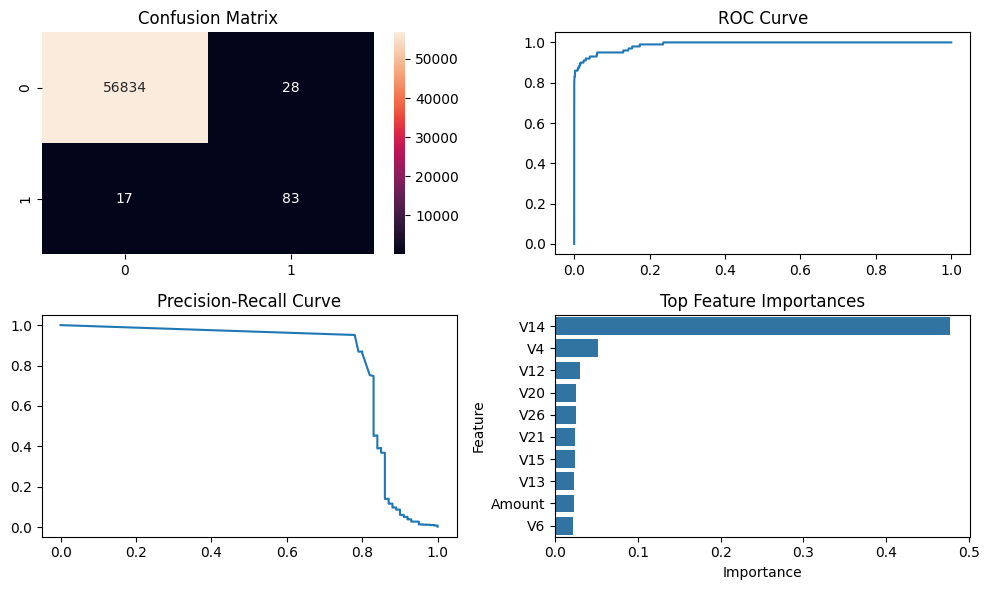

In [31]:

cm = confusion_matrix(y_test, y_pred_final)
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(10,6))

sns.heatmap(cm, annot=True, fmt="d", ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix")

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr)
axs[0, 1].set_title("ROC Curve")

precision, recall, _ = precision_recall_curve(y_test, y_prob)
axs[1, 0].plot(recall, precision)
axs[1, 0].set_title("Precision-Recall Curve")

sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', ax=axs[1, 1])
axs[1, 1].set_title("Top Feature Importances")

plt.tight_layout()
plt.show()


- **Visual Model Evaluation Summary**
    - **ROC AUC:** 0.9888 — Excellent separation between fraud and valid transactions across thresholds
    - **Confusion Matrix:** High recall (83%) with minimal false negatives (17 missed frauds); false positives reduced to 28
    - **Precision-Recall Curve:** Strong curve maintaining lift; confirms effective fraud detection under class imbalance. Precision improves with threshold tuning while recall stays dominant
    - **Top Features:** V14 (nearly 45% contribution), V4, V12, V20 — primary drivers of fraud prediction decisions; ideal candidates for deeper interpretability (e.g., SHAP)

__SHAP on XGBoost__

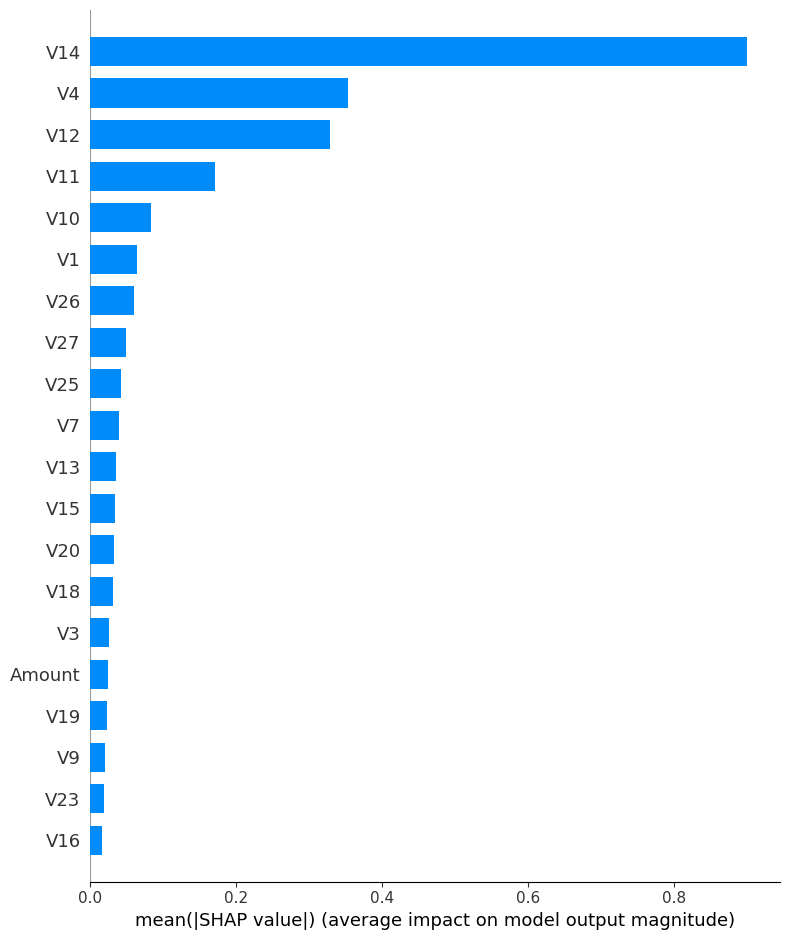

In [32]:
# Load your trained model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance across the dataset
shap.summary_plot(shap_values, X_test, plot_type="bar")

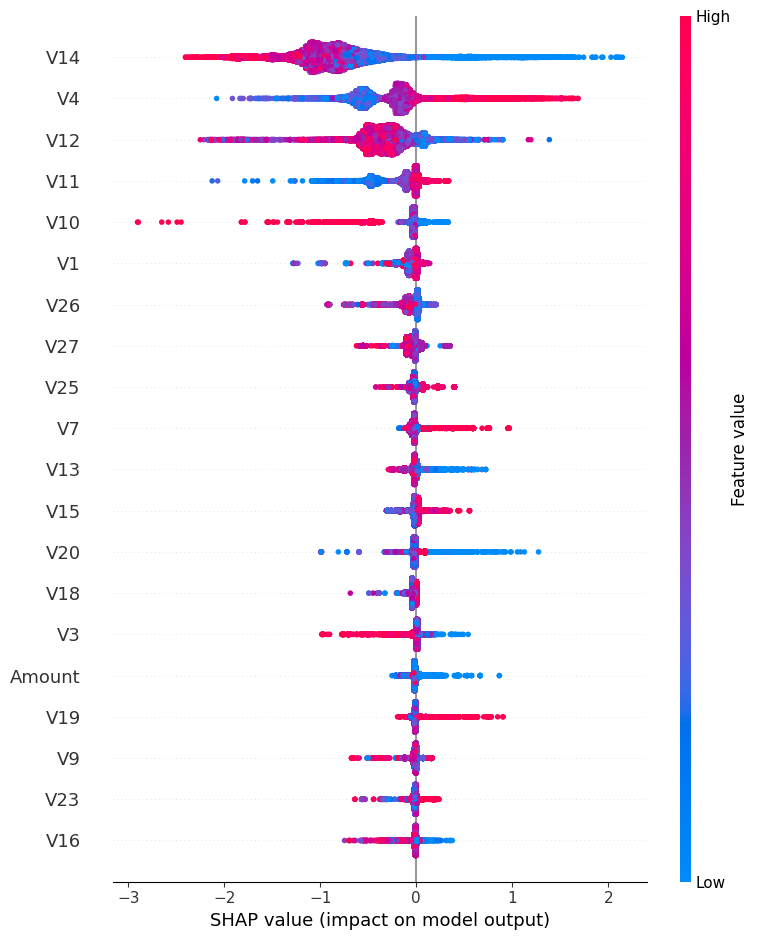

In [33]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

- **SHAP Summary Plot – Global Feature Impact**
    - Visualizes how each feature influenced the model's fraud predictions across the test set
    - **Top Features:** `V14`, `V4`, `V12`, `V11` — most impactful in shifting prediction probability
    - **SHAP Value Range:** -3 to +2 — shows how much each feature pushed the prediction toward fraud (positive) or non-fraud (negative)
    - **Color Encoding:** 
        - Red - high feature values  
        - Blue - low feature values  
    - Helps reveal which feature value ranges are more correlated with fraud
    - **Insight:** Confirms earlier feature rankings, adds directionality, and supports transparent decision reasoning — useful for model audits, SHAP-enabled dashboards, and stakeholder reporting

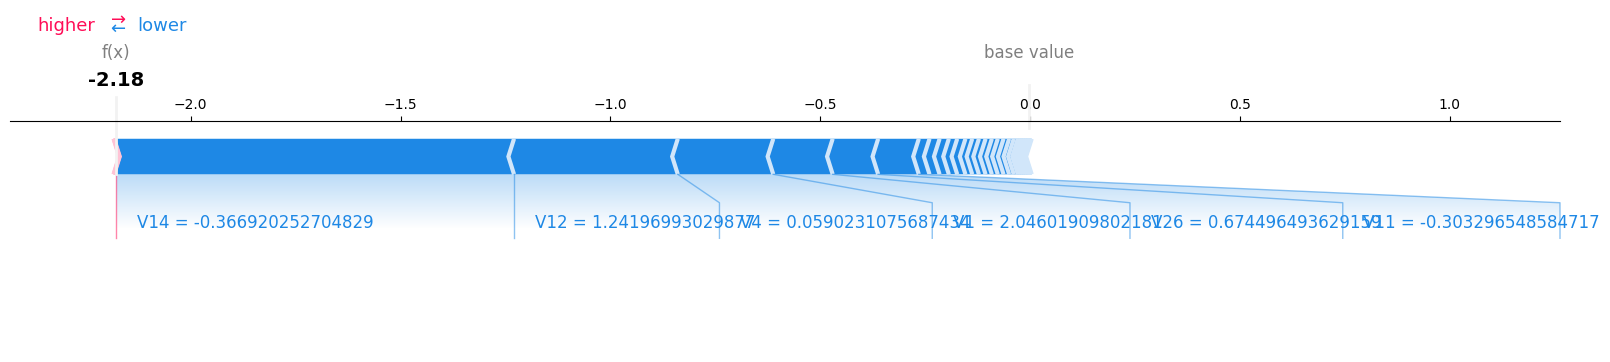

In [34]:
# Initialize SHAP (if using Jupyter Notebook)
shap.initjs()

# Select an instance you want to explain (e.g., index 42)
i = 42

# Generate force plot

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i],
    matplotlib=True
)
plt.show()

- **SHAP Force Plot – Local Explanation (Instance-Level)**
    - Model output: **−2.18** — strong confidence toward non-fraud prediction
    - **Top contributing features:**
        - `V14 = -0.3669` → pushed prediction downward (blue)
        - `V12 = 1.2419` → increased fraud score slightly (red)
        - `V4 = 0.0590`, `V1 = 2.0460` → minor upward influence
        - `V26 = 0.6745`, `V11 = -0.3033` → mixed directional impact
    - **Interpretation:**  
      Features like `V14` and `V11` suppressed the fraud score, while `V12` and `V1` nudged it higher — the net result leaned heavily toward a non-fraud prediction
    - **Use Case:**  
      Helps reviewers understand *why* this specific transaction was labeled as non-fraud. Adds transparency and auditability to model logic.

**Model Saving for Deployment**

In [94]:
import joblib

# Save model
joblib.dump(model, "xgb_fraud_model.pkl")

# Save explainer
joblib.dump(explainer, "explainer.pkl")

# Load later
model = joblib.load("xgb_fraud_model.pkl")
explainer = joblib.load("explainer.pkl")

____

__Generate a JSON payload for real-time prediction__

In [ ]:
import json
# Select one instance from your test set
sample = X_test.iloc[0]   #12567

# Convert to JSON
payload = json.dumps(sample.to_dict(), indent=2) # formatting for better readability
print(payload)

{
  "V1": -2.12544373439372,
  "V2": -0.492320649521997,
  "V3": 0.726297092759467,
  "V4": 1.35646535779827,
  "V5": 1.44918692710607,
  "V6": -1.28921490596406,
  "V7": -0.192726437072702,
  "V8": 0.470135472177887,
  "V9": -1.38094568211094,
  "V10": -0.243029860850929,
  "V11": 0.75090346939697,
  "V12": 0.410382578273678,
  "V13": -0.377531025011657,
  "V14": 1.23115386334779,
  "V15": 0.507482776739042,
  "V16": -0.269497950166703,
  "V17": -0.0326298697855531,
  "V18": 0.686585736460834,
  "V19": 1.32173609258261,
  "V20": 0.529598450899463,
  "V21": 0.305652881937972,
  "V22": 0.0510841478914437,
  "V23": -0.390857512026633,
  "V24": 0.0350669923508556,
  "V25": 0.644108876201091,
  "V26": -0.128855793129849,
  "V27": -0.047062113301082,
  "V28": -0.291846448851326,
  "Amount": 23.68,
  "hour_sin": -0.2588190451025208,
  "hour_cos": -0.9659258262890683
}
